In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

In [11]:
# create a synthetic data
date_range = pd.date_range(start="2010-01-01", periods=120, freq='M')

trend = np.linspace(10 , 60,120) + np.random.normal(0 , 2 , len(date_range))

In [12]:
trend

array([12.45046738,  8.14342481, 13.37009444, 11.02080479,  9.93933819,
       15.43926011, 13.13873087, 12.47024172, 13.76711238, 15.3294235 ,
       13.57654113, 11.15329856, 16.21236204, 12.87118336, 14.86842416,
       15.13617844, 17.72397692, 18.96602593, 16.90371688, 20.1314386 ,
       18.52043866, 18.75561512, 22.87365887, 22.91423319, 19.21107847,
       20.43857523, 21.07059687, 22.51214805, 22.49738879, 24.52488   ,
       24.89124059, 20.77144435, 20.51209094, 25.77290697, 24.14633114,
       25.87452044, 25.76332938, 24.68153154, 29.52548939, 25.69559075,
       23.771693  , 26.01542866, 27.07390797, 30.48208071, 28.52082786,
       26.44081753, 32.07127382, 28.75776582, 28.14454456, 29.07212587,
       33.18435862, 25.34081657, 28.86221955, 34.91737902, 32.08725722,
       35.41530133, 34.0399395 , 35.11372389, 34.51380614, 35.71779682,
       33.75188558, 34.79355285, 36.28748093, 35.33056797, 41.04023421,
       37.6051642 , 35.946249  , 39.80772072, 40.72804585, 37.07

In [13]:
# 2. Seasonality: yearly repeating pattern
seasonality = 10 * np.sin(2 * np.pi * (date_range.month) / 12)


In [14]:
seasonality

Index([      4.999999999999999,       8.660254037844386,
                          10.0,       8.660254037844387,
             4.999999999999999,  1.2246467991473533e-15,
            -4.999999999999997,      -8.660254037844386,
                         -10.0,      -8.660254037844386,
       ...
                          10.0,       8.660254037844387,
             4.999999999999999,  1.2246467991473533e-15,
            -4.999999999999997,      -8.660254037844386,
                         -10.0,      -8.660254037844386,
            -5.000000000000004, -2.4492935982947065e-15],
      dtype='float64', length=120)

In [15]:
# 3. Cyclic variation: long-term business cycle (~7 years, not fixed)
cyclic = 15 * np.sin(2 * np.pi * date_range.year / 7)


In [16]:
cyclic

Index([11.727472237019656, 11.727472237019656, 11.727472237019656,
       11.727472237019656, 11.727472237019656, 11.727472237019656,
       11.727472237019656, 11.727472237019656, 11.727472237019656,
       11.727472237019656,
       ...
        6.508256086762694,  6.508256086762694,  6.508256086762694,
        6.508256086762694,  6.508256086762694,  6.508256086762694,
        6.508256086762694,  6.508256086762694,  6.508256086762694,
        6.508256086762694],
      dtype='float64', length=120)

In [17]:
# 4. Irregular (noise): random unpredictable variations
noise = np.random.normal(0, 3, len(date_range))

In [18]:
noise

array([ 3.62628819e-01, -3.91902081e+00,  2.80873159e+00, -2.82736264e+00,
        1.34081275e+00, -1.63964649e+00, -3.89075218e+00, -1.64918691e+00,
        6.71541999e-01, -1.08536383e+00, -7.50953624e-01,  5.97208975e-02,
       -1.07469620e+00,  1.68635208e+00, -3.14290400e+00,  9.06276630e+00,
        2.85319418e+00,  5.42677060e+00, -1.48273735e+00,  1.96469130e+00,
       -1.96146825e-01, -2.45985600e+00,  3.30827244e+00,  1.39074221e+00,
       -4.84602294e+00, -4.87731734e+00,  1.92015446e+00, -1.45174561e+00,
       -3.59211815e+00,  3.75883907e+00,  1.23227370e+00, -1.75803386e+00,
       -4.16274480e+00, -6.67264442e-03,  4.35470368e+00, -5.53820606e-01,
        9.90096777e-01,  2.63866245e+00,  1.13333163e+00,  4.81083912e+00,
       -5.67231123e+00,  9.64484950e-01,  2.92618845e+00,  3.74835722e+00,
        1.11553754e+00, -1.48199487e+00,  1.78976521e+00,  7.33932008e-01,
        3.75271007e-01, -1.10659032e+00,  1.24132232e+00, -1.30415265e+00,
        2.29615634e-01, -

In [43]:
# complete time series 

time_series = trend + seasonality + cyclic + noise
len(time_series)

120

In [21]:
# plot all the component together

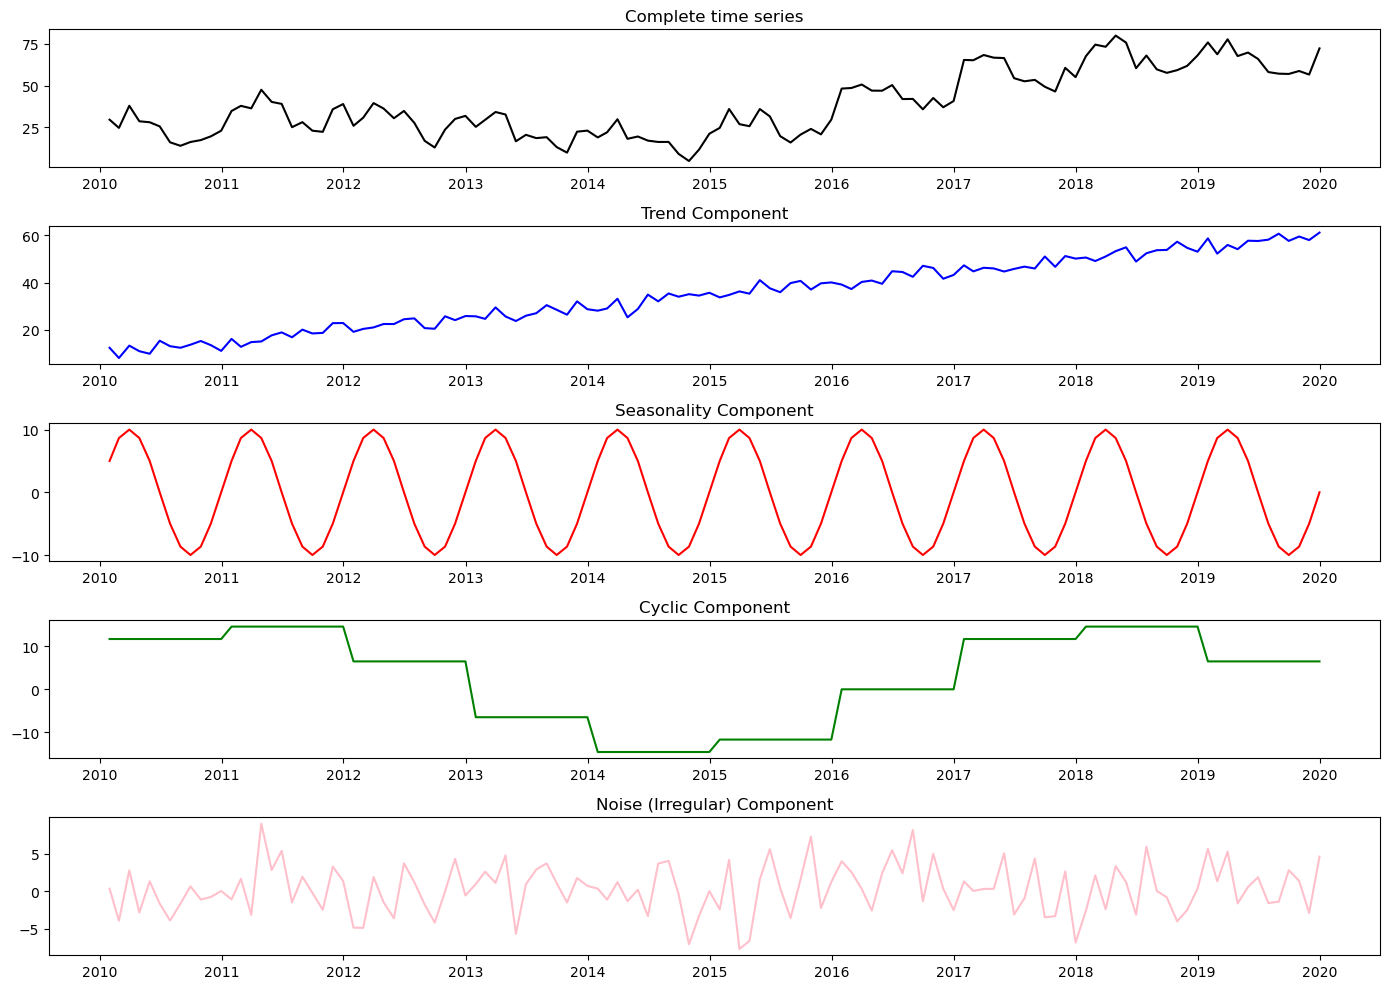

In [36]:
plt.figure(figsize = (14 ,10))

plt.subplot(5 , 1, 1)
plt.plot(date_range ,time_series , color = 'black')
plt.title("Complete time series")

# trend 
plt.subplot(5 ,1, 2)
plt.plot(date_range , trend ,color = 'blue')
plt.title('Trend Component')

# Seasonality 
plt.subplot(5 , 1 , 3)
plt.plot(date_range , seasonality , color = 'red')
plt.title("Seasonality Component")

#Cyclic
plt.subplot(5 ,1  , 4)
plt.plot(date_range , cyclic , color = 'green')
plt.title("Cyclic Component")

# Noise
plt.subplot(5 , 1 , 5)
plt.plot(date_range , noise ,color = 'pink')
plt.title("Noise (Irregular) Component")

plt.tight_layout()
plt.show()          

In [38]:
# RUN ADF TEStT
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller(time_series)

print("ADF Statistics" , result[0])
print("p-value" , result[1])
print('No. of lags used' , result[2])
print('No. of observation used' , result[3])
print('Critical value' , result[4])

ADF Statistics -0.3909945562903928
p-value 0.9115915407172841
No. of lags used 13
No. of observation used 106
Critical value {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


In [42]:
if result[1] < 0.05:
    print("Reject null hypothesis , (series is stationary)")

else:
    print("Failed to reject null hypothesis , (Series is not stationary)")
    

Failed to reject null hypothesis , (Series is not stationary)
